In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 업로드
from google.colab import files
uploaded = files.upload()

Saving 202501.xlsx to 202501.xlsx


In [2]:
# 데이터 불러오기
df = pd.read_excel('202501.xlsx')

In [3]:
# 날짜 및 시간 추출
df['Pump-Begin'] = pd.to_datetime(df['Pump-Begin'])
df['Date'] = df['Pump-Begin'].dt.date
df['Hour'] = df['Pump-Begin'].dt.hour

In [8]:
# 특정 금속 대상 선정 (Al, Si, S, K, Ca, Fe, Zn 대상)
target_metals = ['Al(ng/m3)',
                 'Si(ng/m3)',
                 'S(ng/m3)',
                 'K(ng/m3)',
                 'Ca(ng/m3)',
                 'Fe(ng/m3)',
                 'Zn(ng/m3)']

In [12]:
# 날짜별 평균 농도 계산
daily_avg = df.groupby('Date')[target_metals].mean()

daily_avg.head()

,Al(ng/m3),Si(ng/m3),S(ng/m3),K(ng/m3),Ca(ng/m3),Fe(ng/m3),Zn(ng/m3)
Date,,,,,,,
2025-01-10,538.973333,760.786667,2219.214167,264.145833,129.110833,99.624167,16.775833
2025-01-11,452.053333,747.914583,3660.784583,233.241250,112.280417,119.947083,16.836667
2025-01-12,462.824583,817.724583,3892.743750,266.025000,126.240000,110.134583,15.649583
2025-01-13,542.693750,1117.748333,4561.004167,281.333750,135.499583,126.287500,14.810417
2025-01-14,727.442083,2117.083333,5536.207500,382.162500,205.361250,175.385833,14.270000


In [18]:
# 금속 간 상관관계 계산
corr_matrix = daily_avg.corr()

corr_matrix.head(7)

,Al(ng/m3),Si(ng/m3),S(ng/m3),K(ng/m3),Ca(ng/m3),Fe(ng/m3),Zn(ng/m3)
Al(ng/m3),1.000000,0.747925,0.600416,0.689010,0.851379,0.637819,0.202995
Si(ng/m3),0.747925,1.000000,0.296974,0.115948,0.969966,0.602272,0.116983
S(ng/m3),0.600416,0.296974,1.000000,0.651952,0.353789,0.731767,0.473002
K(ng/m3),0.689010,0.115948,0.651952,1.000000,0.271672,0.315912,0.028473
Ca(ng/m3),0.851379,0.969966,0.353789,0.271672,1.000000,0.656018,0.171988
Fe(ng/m3),0.637819,0.602272,0.731767,0.315912,0.656018,1.000000,0.732080
Zn(ng/m3),0.202995,0.116983,0.473002,0.028473,0.171988,0.732080,1.000000


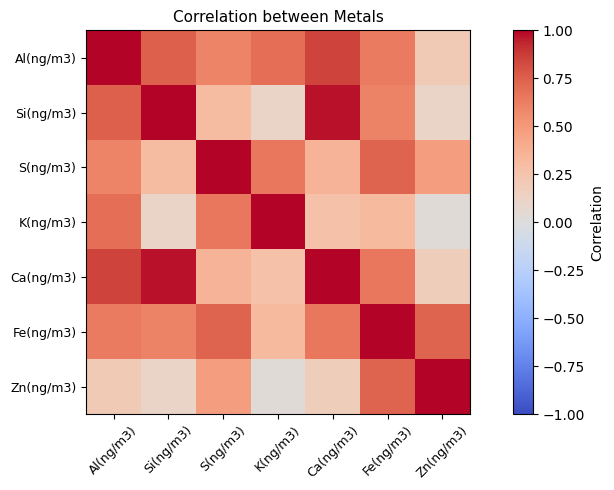

특정 금속 간 상관계수:
           Al(ng/m3)  Si(ng/m3)  S(ng/m3)  K(ng/m3)  Ca(ng/m3)  Fe(ng/m3)  \
Al(ng/m3)   1.000000   0.747925  0.600416  0.689010   0.851379   0.637819   
Si(ng/m3)   0.747925   1.000000  0.296974  0.115948   0.969966   0.602272   
S(ng/m3)    0.600416   0.296974  1.000000  0.651952   0.353789   0.731767   
K(ng/m3)    0.689010   0.115948  0.651952  1.000000   0.271672   0.315912   
Ca(ng/m3)   0.851379   0.969966  0.353789  0.271672   1.000000   0.656018   
Fe(ng/m3)   0.637819   0.602272  0.731767  0.315912   0.656018   1.000000   
Zn(ng/m3)   0.202995   0.116983  0.473002  0.028473   0.171988   0.732080   

           Zn(ng/m3)  
Al(ng/m3)   0.202995  
Si(ng/m3)   0.116983  
S(ng/m3)    0.473002  
K(ng/m3)    0.028473  
Ca(ng/m3)   0.171988  
Fe(ng/m3)   0.732080  
Zn(ng/m3)   1.000000  


In [32]:
# 히트맵
plt.figure(figsize=(9,5))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(target_metals)), target_metals, rotation=45, fontsize=9)
plt.yticks(range(len(target_metals)), target_metals, fontsize=9)
plt.title('Correlation between Metals', fontsize=11)
plt.tight_layout()
plt.show()

# 상관계수 결과 출력
print("특정 금속 간 상관계수:")
print(corr_matrix)